In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### FOR MAC
#import_path = "/Users/michalmacbookpro/Downloads/titanic/"
#train = pd.read_csv(import_path + "train.csv",index_col="PassengerId")
#test = pd.read_csv(import_path + "test.csv",index_col="PassengerId")
#submision = pd.read_csv(import_path + "gender_submission.csv")

In [2]:
### FOR WINDOWS
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")
submision = pd.read_csv( "./titanic/gender_submission.csv")

In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
def titulizer(df):
    df["Title"] = df["Name"].str.extract(r"([A-Za-z]+\.)")
    df["Title"].replace(['Capt.', 'Col.','Major.',"Master.",'Master.','Countess.', 'Don.', 'Dona.', 'Dr.', 'Jonkheer.', 'Lady.', 'Rev.', 'Sir.'], 'Rare.', inplace = True)
    df["Title"].replace(['Mlle.', 'Ms.'], 'Miss.', inplace = True)
    df["Title"].replace(['Mme.'], 'Mrs.', inplace = True)
    return df


#df_train.sample(10)
def cabinizer(df):
    df["Cabin_L"] = df["Cabin"].str.extract(r"(^\D{0,1})")
    df["Cabin_L"].fillna("U",inplace=True)
    df["Cabin_L"] = df["Cabin_L"].map({"A":"ABC","B":"ABC","C":"ABC","D":"DE","E":"DE","F":"FG","G":"FG","T":"ABC","U":"U"})
    return df


def agegrouping(df):
    df["Age_Group"] = pd.cut(df["Age"],bins=[0,17,33,49,65,83],labels=[1,2,3,4,5])
    return df

def faregrouping(df):
    df["Fare_Group"] = pd.cut(df["Fare"],bins=[-1,7,14,32,600],labels=[1,2,3,4])
    return df

def age_imp(df):
    df["Age"].fillna(np.mean(df["Age"]),inplace=True)
    return df

def familiazer(df):
    df["Family"] = df["SibSp"] + df["Parch"]
    df["Family"] = df["Family"]
    return df


def aloniazer(df):
    df["Alone"] = 0
    df.loc[df["Family"]==0,"Alone"] = 1
    return df


In [5]:
combined =[train, test]
combined = pd.concat(combined,axis=0)

In [6]:
combined.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
combined["Age"].fillna(np.mean(combined["Age"]),inplace=True)
combined["Fare"].fillna(np.mean(combined["Fare"]),inplace=True)
combined["Embarked"].fillna("C",inplace=True)
combined.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [8]:
titulizer(combined)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,NaN,S,Mr.
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Rare.
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.
416,1308,NaN,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,NaN,S,Mr.


In [9]:
combined["Title"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Rare.'], dtype=object)

In [10]:
combined["Fare"].describe()

count    1309.000000
mean       33.295479
std        51.738879
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [11]:
agegrouping(combined)
faregrouping(combined)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Group,Fare_Group
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.,2,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,3,4
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,2,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,3,4
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr.,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,NaN,S,Mr.,2,2
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Rare.,3,4
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.,3,2
416,1308,NaN,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,NaN,S,Mr.,2,2


In [12]:
combined["Age_Group"].unique()

[2, 3, 4, 1, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [13]:
combined["Fare_Group"].unique()

[2, 4, 3, 1]
Categories (4, int64): [1 < 2 < 3 < 4]

<AxesSubplot:xlabel='Parch', ylabel='Count'>

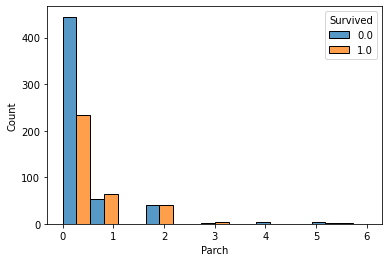

In [14]:
sns.histplot(x=combined["Parch"].iloc[:len(train)],hue=combined["Survived"].iloc[:len(train)],multiple="dodge")

In [15]:
cabinizer(combined)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Group,Fare_Group,Cabin_L
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.,2,2,U
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,3,4,ABC
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,2,2,U
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,3,4,ABC
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr.,3,2,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,NaN,S,Mr.,2,2,U
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Rare.,3,4,ABC
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.,3,2,U
416,1308,NaN,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,NaN,S,Mr.,2,2,U


In [16]:
familiazer(combined)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Group,Fare_Group,Cabin_L,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.,2,2,U,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,3,4,ABC,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,2,2,U,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,3,4,ABC,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr.,3,2,U,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,NaN,S,Mr.,2,2,U,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Rare.,3,4,ABC,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.,3,2,U,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,NaN,S,Mr.,2,2,U,0


In [17]:
aloniazer(combined)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Group,Fare_Group,Cabin_L,Family,Alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.,2,2,U,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,3,4,ABC,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,2,2,U,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,3,4,ABC,1,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr.,3,2,U,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,NaN,S,Mr.,2,2,U,0,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Rare.,3,4,ABC,0,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.,3,2,U,0,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,NaN,S,Mr.,2,2,U,0,1


In [18]:
combined["Alone"].value_counts()

1    790
0    519
Name: Alone, dtype: int64

<AxesSubplot:xlabel='Alone', ylabel='Count'>

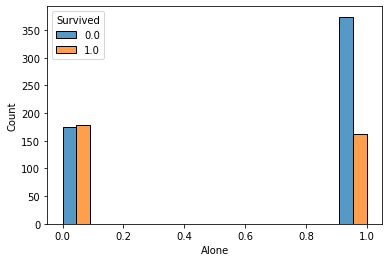

In [19]:
sns.histplot(x=combined["Alone"].iloc[:len(train)] ,hue=combined["Survived"].iloc[:len(train)],multiple="dodge")

In [20]:
combined.drop(["PassengerId","Ticket","Name","SibSp","Parch","Cabin"],axis=1,inplace=True)
combined

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age_Group,Fare_Group,Cabin_L,Family,Alone
0,0.0,3,male,22.000000,7.2500,S,Mr.,2,2,U,1,0
1,1.0,1,female,38.000000,71.2833,C,Mrs.,3,4,ABC,1,0
2,1.0,3,female,26.000000,7.9250,S,Miss.,2,2,U,0,1
3,1.0,1,female,35.000000,53.1000,S,Mrs.,3,4,ABC,1,0
4,0.0,3,male,35.000000,8.0500,S,Mr.,3,2,U,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,male,29.881138,8.0500,S,Mr.,2,2,U,0,1
414,NaN,1,female,39.000000,108.9000,C,Rare.,3,4,ABC,0,1
415,NaN,3,male,38.500000,7.2500,S,Mr.,3,2,U,0,1
416,NaN,3,male,29.881138,8.0500,S,Mr.,2,2,U,0,1


In [21]:
from sklearn.preprocessing import OrdinalEncoder

oc = OrdinalEncoder()

In [22]:
combined[["Sex","Embarked","Title","Cabin_L"]] = oc.fit_transform(combined[["Sex","Embarked","Title","Cabin_L"]])
combined

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age_Group,Fare_Group,Cabin_L,Family,Alone
0,0.0,3,1.0,22.000000,7.2500,2.0,1.0,2,2,3.0,1,0
1,1.0,1,0.0,38.000000,71.2833,0.0,2.0,3,4,0.0,1,0
2,1.0,3,0.0,26.000000,7.9250,2.0,0.0,2,2,3.0,0,1
3,1.0,1,0.0,35.000000,53.1000,2.0,2.0,3,4,0.0,1,0
4,0.0,3,1.0,35.000000,8.0500,2.0,1.0,3,2,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,1.0,29.881138,8.0500,2.0,1.0,2,2,3.0,0,1
414,NaN,1,0.0,39.000000,108.9000,0.0,3.0,3,4,0.0,0,1
415,NaN,3,1.0,38.500000,7.2500,2.0,1.0,3,2,3.0,0,1
416,NaN,3,1.0,29.881138,8.0500,2.0,1.0,2,2,3.0,0,1


In [23]:
combined["F_and_T"] = (combined["Family"]**3) * (combined["Title"]**2)

In [24]:
combined["Age_Group"] = combined["Age_Group"].astype("int")
combined["Fare_Group"] = combined["Fare_Group"].astype("int")

<AxesSubplot:>

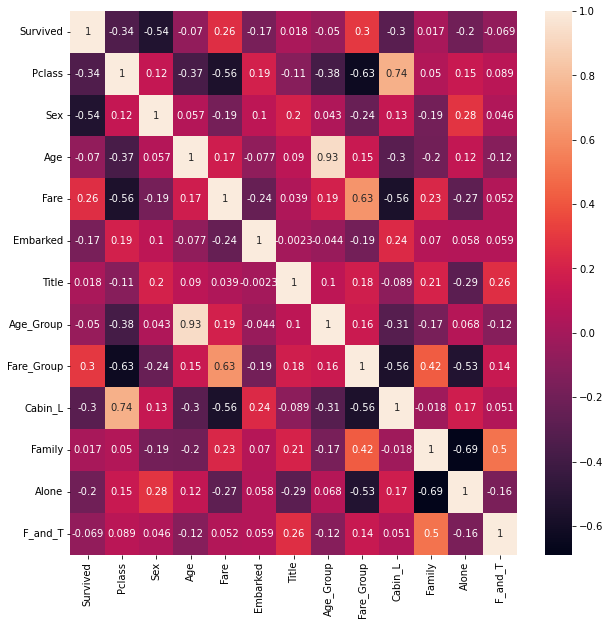

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(combined.corr(),annot=True)

In [26]:
to_drop = ["Age_Group","F_and_T","Family","Title"]

In [28]:
combined.drop(to_drop,inplace=True,axis=1)
combined

,Survived,Pclass,Sex,Age,Fare,Embarked,Fare_Group,Cabin_L,Alone
0,0.0,3,1.0,22.000000,7.2500,2.0,2,3.0,0
1,1.0,1,0.0,38.000000,71.2833,0.0,4,0.0,0
2,1.0,3,0.0,26.000000,7.9250,2.0,2,3.0,1
3,1.0,1,0.0,35.000000,53.1000,2.0,4,0.0,0
4,0.0,3,1.0,35.000000,8.0500,2.0,2,3.0,1
...,...,...,...,...,...,...,...,...,...
413,NaN,3,1.0,29.881138,8.0500,2.0,2,3.0,1
414,NaN,1,0.0,39.000000,108.9000,0.0,4,0.0,1
415,NaN,3,1.0,38.500000,7.2500,2.0,2,3.0,1
416,NaN,3,1.0,29.881138,8.0500,2.0,2,3.0,1


In [29]:
train = combined.iloc[:len(train),:]

In [30]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Fare_Group,Cabin_L,Alone
0,0.0,3,1.0,22.000000,7.2500,2.0,2,3.0,0
1,1.0,1,0.0,38.000000,71.2833,0.0,4,0.0,0
2,1.0,3,0.0,26.000000,7.9250,2.0,2,3.0,1
3,1.0,1,0.0,35.000000,53.1000,2.0,4,0.0,0
4,0.0,3,1.0,35.000000,8.0500,2.0,2,3.0,1
...,...,...,...,...,...,...,...,...,...
886,0.0,2,1.0,27.000000,13.0000,2.0,2,3.0,1
887,1.0,1,0.0,19.000000,30.0000,2.0,3,0.0,1
888,0.0,3,0.0,29.881138,23.4500,2.0,3,3.0,0
889,1.0,1,1.0,26.000000,30.0000,0.0,3,0.0,1


In [31]:
test = combined.iloc[len(train):,:]
test

,Survived,Pclass,Sex,Age,Fare,Embarked,Fare_Group,Cabin_L,Alone
0,NaN,3,1.0,34.500000,7.8292,1.0,2,3.0,1
1,NaN,3,0.0,47.000000,7.0000,2.0,1,3.0,0
2,NaN,2,1.0,62.000000,9.6875,1.0,2,3.0,1
3,NaN,3,1.0,27.000000,8.6625,2.0,2,3.0,1
4,NaN,3,0.0,22.000000,12.2875,2.0,2,3.0,0
...,...,...,...,...,...,...,...,...,...
413,NaN,3,1.0,29.881138,8.0500,2.0,2,3.0,1
414,NaN,1,0.0,39.000000,108.9000,0.0,4,0.0,1
415,NaN,3,1.0,38.500000,7.2500,2.0,2,3.0,1
416,NaN,3,1.0,29.881138,8.0500,2.0,2,3.0,1


In [32]:
y = train["Survived"].copy()

In [34]:
print(f"{train.shape},{y.shape},{test.shape}")

(891, 9),(891,),(418, 9)


In [36]:
train.drop(["Survived"],axis=1,inplace=True)
test.drop(["Survived"],axis=1,inplace=True)

F:\Conda\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(train,y,test_size=0.3,stratify=y,random_state=42)

In [41]:
X_train.corrwith(y_train,axis=0)

Pclass       -0.335331
Sex          -0.552556
Age          -0.098377
Fare          0.279393
Embarked     -0.187679
Fare_Group    0.314856
Cabin_L      -0.329187
Alone        -0.203274
dtype: float64

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [44]:
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()

In [48]:
param = [{
    "criterion": ['gini', 'entropy'],
    "n_estimators":[100,200,300,400,500,600],
    'max_depth': range(4, 20, 2),
    'max_leaf_nodes': range(4, 28, 2),
}]

gs_rt = GridSearchCV(rfc, param, cv = 5, n_jobs = -1, verbose = 1)
gs_rt.fit(X_train, y_train)
y_pred = gs_rt.predict(X_test)
print(gs_rt.best_estimator_)
print(accuracy_score(y_pred,y_test))
#rt_rs_best = gs_rt.best_estimator_

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
RandomForestClassifier(max_depth=14, max_leaf_nodes=12)
0.7910447761194029


In [49]:
rfc_best = RandomForestClassifier(criterion="entropy", max_depth=16, max_leaf_nodes=22, n_estimators=400)

rfc_best.fit(X_train,y_train)
y_pred_2 = rfc_best.predict(X_test)
print(accuracy_score(y_pred_2,y_test))

0.7947761194029851


In [50]:
param = [
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': range(2, 20, 2),
        'max_leaf_nodes': range(4, 28, 2),
    }
]

gs_dt = GridSearchCV(dtc, param, cv = 5, n_jobs = -1, verbose = 1,scoring="accuracy")
gs_dt.fit(X_train, y_train)
y_pred = gs_dt.predict(X_test)
print(accuracy_score(y_pred,y_test))
#dt_gs_best = gs_dt.best_estimator_
print(gs_dt.best_estimator_)
#print(f1_score(y_pred,y_test))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
0.8022388059701493
DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=14)


In [51]:
dtc_best = RandomForestClassifier(criterion="entropy", max_depth=8, max_leaf_nodes=14)

dtc_best.fit(X_train,y_train)
y_pred_3 = dtc_best.predict(X_test)
print(accuracy_score(y_pred_3,y_test))

0.7985074626865671


In [52]:
from sklearn.svm import SVC

svc = SVC()

param = [
    {
        'kernel': ['poly',"rbf"], 'C': [0.1, 0.3, 1, 2, 3, 4], 
        'gamma': [0.1,0.2,0.3]
    }, 
]

svc = SVC(probability = True)
rs_svc = GridSearchCV(svc, param, cv =5, n_jobs = -1, verbose = 1)
rs_svc.fit(X_train, y_train)
y_pred = rs_svc.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(rs_svc.best_estimator_)
print(accuracy_score(y_pred,y_test))
svc_best = rs_svc.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [137]:
svc_best = SVC(C=2, gamma=0.1, kernel='rbf', probability=True)
svc_best.fit(X_train,y_train)
y_pred_4 = svc_best.predict(X_test)
print(accuracy_score(y_pred_4,y_test))

0.7649253731343284


In [157]:
param = [
    {'n_estimators': range(8, 28, 4), 
     'max_depth': range(24, 48, 4),
     'max_leaf_nodes': range(20, 48, 4),
    }
]

et = ExtraTreesClassifier()
gs_et = RandomizedSearchCV(et, param, cv = 5, n_jobs = -1, verbose = 1)
gs_et.fit(X_train, y_train)
y_pred = gs_et.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(gs_et.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.7873134328358209
ExtraTreesClassifier(max_depth=24, max_leaf_nodes=36, n_estimators=16)


In [139]:
xtree_best = gs_et.best_estimator_
xtree_best.fit(X_train,y_train)
y_pred_5 = xtree_best.predict(X_test)
print(accuracy_score(y_pred_5,y_test))

0.7835820895522388


In [158]:
#X_train["Fare_Group"] = X_train["Fare_Group"].astype("int")

In [159]:
#X_train["Age_Group"] = X_train["Age_Group"].astype("int")

In [160]:
#param_grid={
#    'max_depth': range(2, 10, 2),
#    'n_estimators': range(26, 46, 2),
#    'learning_rate': [0.2, 0.1, 0.03, 0.01]
#}

#xg = XGBClassifier(eval_metric='logloss', n_jobs = -1, use_label_encoder = False)
#gs_xg = RandomizedSearchCV(xg, param_grid, cv = 5, n_jobs = -1, verbose = 1)
#gs_xg.fit(X_train, y_train)
#y_pred = gs_xg.predict(X_test)
#print(accuracy_score(y_pred,y_test))
#print(gs_xg.best_estimator_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype inste

0.7835820895522388
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=32, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


In [161]:
#xboo_best = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
# #             eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
# ##             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
# ###             max_depth=6, min_child_weight=1,
# ###             monotone_constraints='()', n_estimators=26, n_jobs=-1,
####              num_parallel_tree=1, predictor='auto', random_state=0,
####              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
#              tree_method='exact', use_label_encoder=False,
#              validate_parameters=1, verbosity=None)
#xboo_best.fit(X_train,y_train)
#y_pred_6 = xboo_best.predict(X_test)
#print(accuracy_score(y_pred_6,y_test))

0.7835820895522388


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [162]:
voting_clf = VotingClassifier(estimators=[
    ("rand_for",rfc_best),
    ("dec_tree",dtc_best),
    ("svc",svc_best),
    ("extree",xtree_best),
    #("xgb",xboo_best)],
    voting = 'soft', n_jobs = -1, verbose = 1)
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print(accuracy_score(y_pred,y_test))

/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[Voting] ................... (4 of 5) Processing extree, total=   0.0s
[Voting] ...................... (3 of 5) Processing svc, total=   0.1s
[Voting] ................. (2 of 5) Processing dec_tree, total=   0.1s
[Voting] ...................... (5 of 5) Processing xgb, total=   0.1s
[Voting] ................. (1 of 5) Processing rand_for, total=   0.3s
0.7873134328358209
